In [1]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
final = pd.read_csv('../data/final.csv', index_col=0)

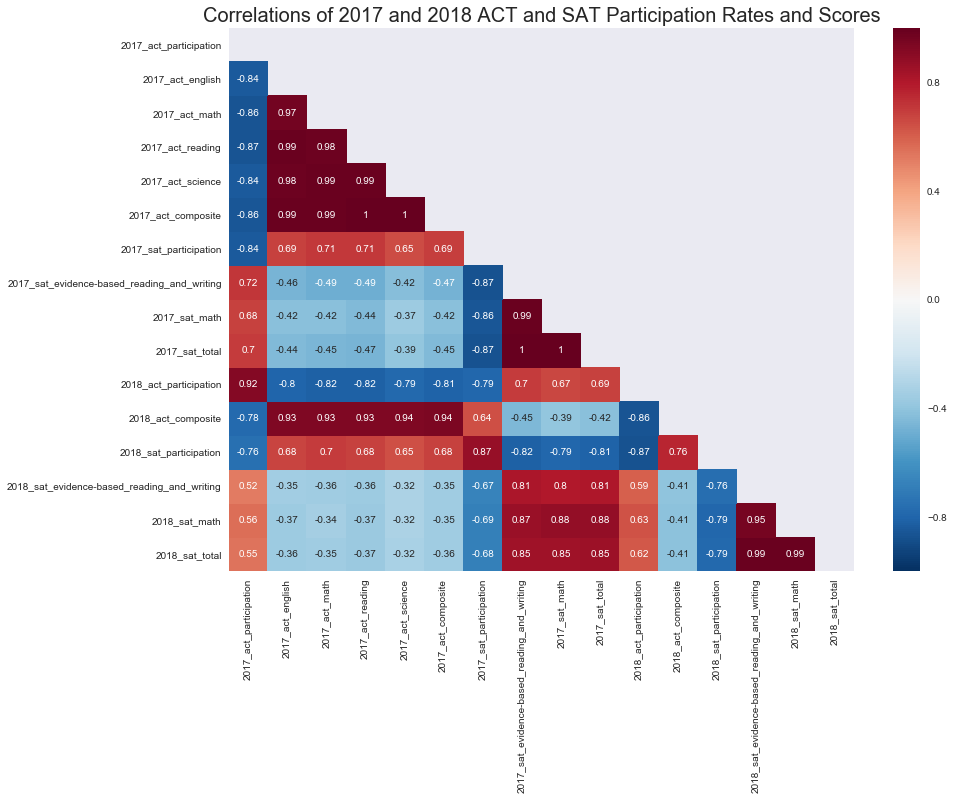

In [3]:
plt.figure(figsize=(14,10))
corr = final.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = plt.axes()
sns.heatmap(final.corr(), annot=True, mask=mask)
ax.set_title('Correlations of 2017 and 2018 ACT and SAT Participation Rates and Scores', fontsize=20);
# referenced https://seaborn.pydata.org/examples/many_pairwise_correlations.html

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [4]:
def subplot_histograms(dataframe, list_of_columns, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (16,9))  
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns):
        ax[i].hist(dataframe[column])
        ax[i].set_title(f'distribution of {column}', fontsize=18)
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].axvline(dataframe[column].mean(), c='r')
        fig.tight_layout()

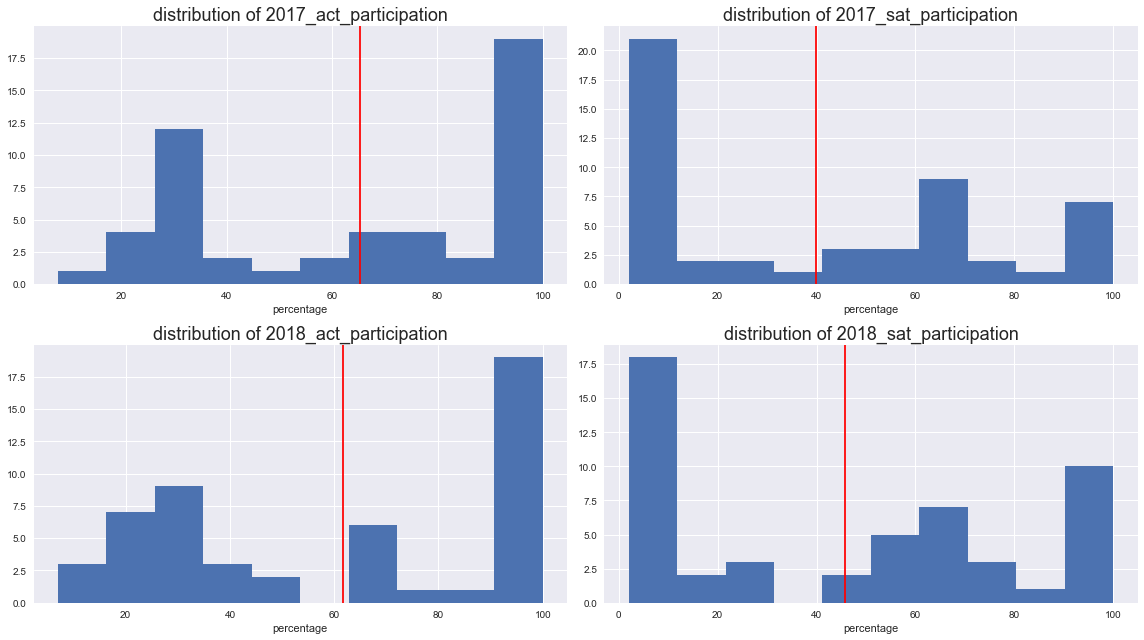

In [5]:
# histograms of participation rates
columns = ['2017_act_participation', '2017_sat_participation', '2018_act_participation', '2018_sat_participation']
xlabels = ['percentage','percentage','percentage','percentage']
subplot_histograms(final, columns, xlabels)

 no recognizable distribution

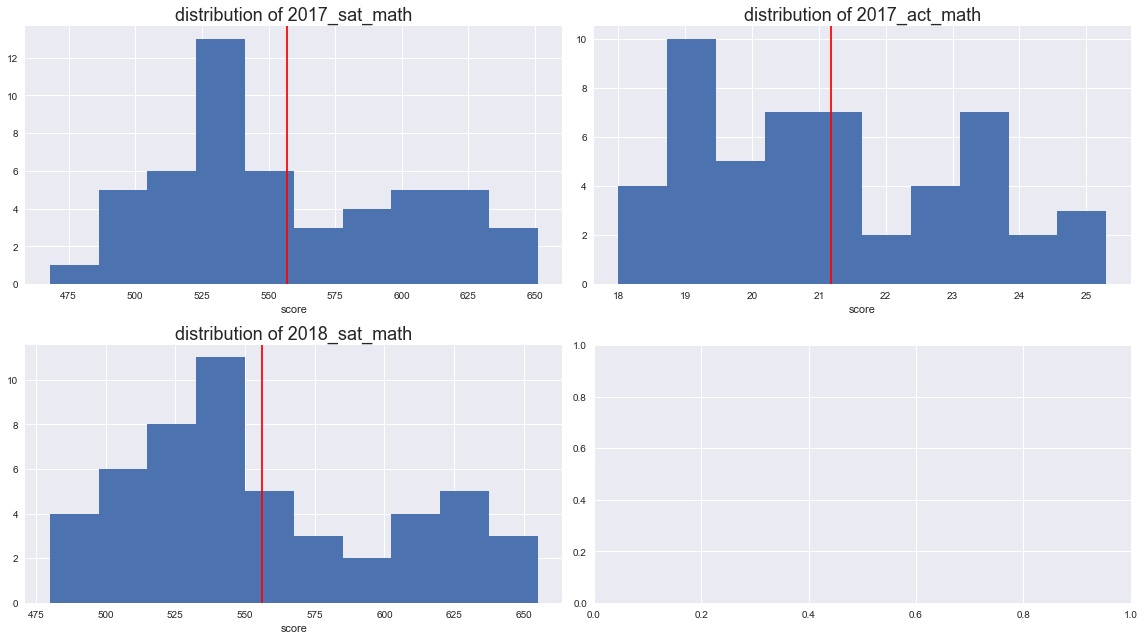

In [6]:
# histograms of math scores
columns = ['2017_sat_math', '2017_act_math', '2018_sat_math']
xlabels = ['score', 'score', 'score']
subplot_histograms(final, columns, xlabels)

no recognizable distribution

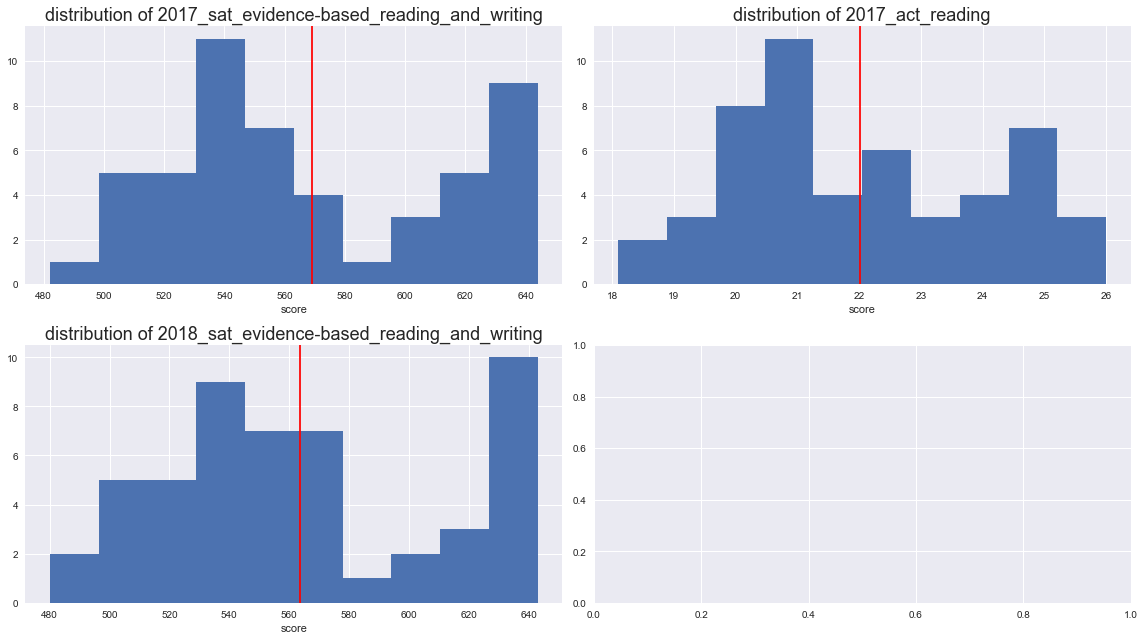

In [7]:
# histograms of reading scores
columns = ['2017_sat_evidence-based_reading_and_writing', '2017_act_reading', '2018_sat_evidence-based_reading_and_writing']
xlabels = ['score', 'score', 'score']
subplot_histograms(final, columns, xlabels)

no recognizable distribution

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [17]:
def plot_scatterplot(x, y, title, ylabel, xlabel, df = final):
    plt.figure(figsize=(16,9))
    x = df[x]
    y = df[y]
    sns.regplot(x, y, fit_reg=False)
    plt.title(title, fontsize=20)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

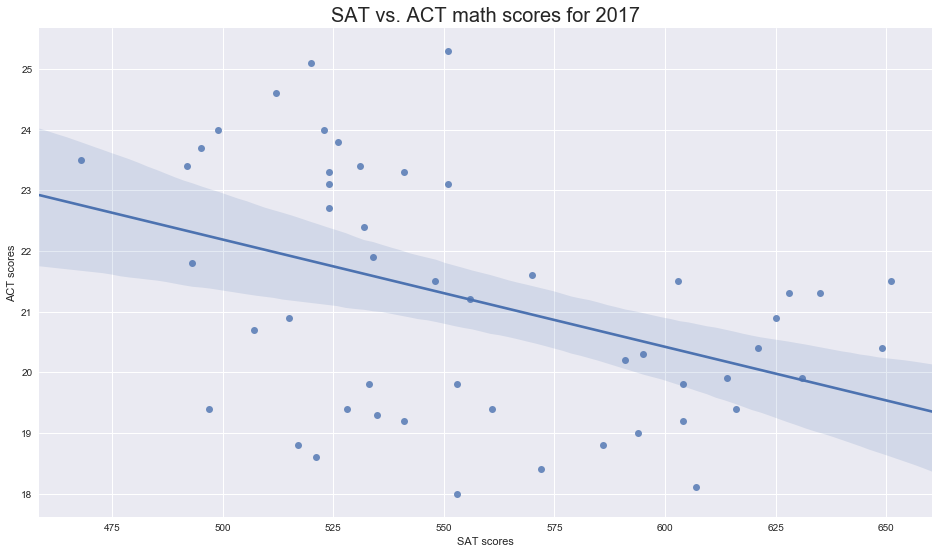

In [9]:
plot_scatterplot('2017_sat_math',
            '2017_act_math',
            "SAT vs. ACT math scores for 2017",
            "ACT scores",
            "SAT scores")

Negative correlation between 2017 SAT and ACT math scores

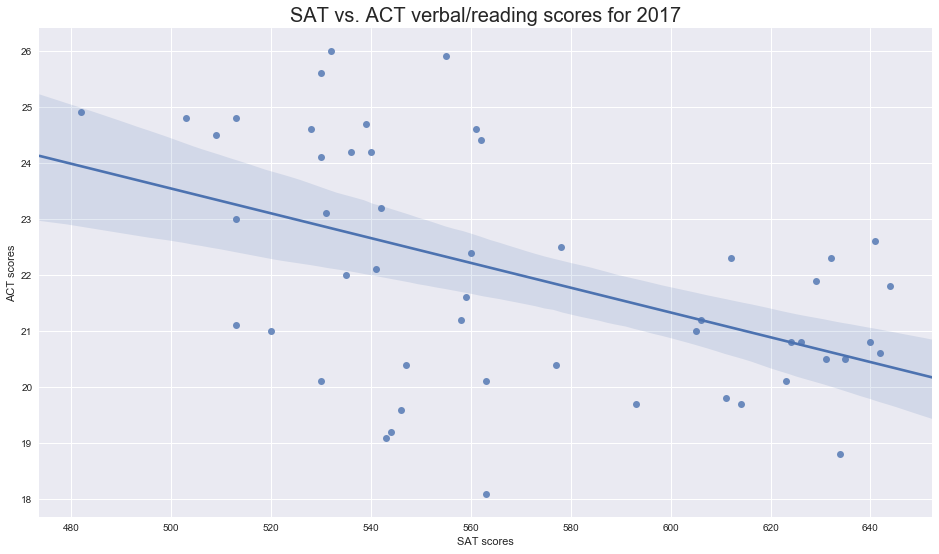

In [10]:
plot_scatterplot('2017_sat_evidence-based_reading_and_writing',
            '2017_act_reading',
            "SAT vs. ACT verbal/reading scores for 2017",
            "ACT scores",
            "SAT scores")

Negative correlation between 2017 SAT Reading/Writing and 2017 ACT Reading scores

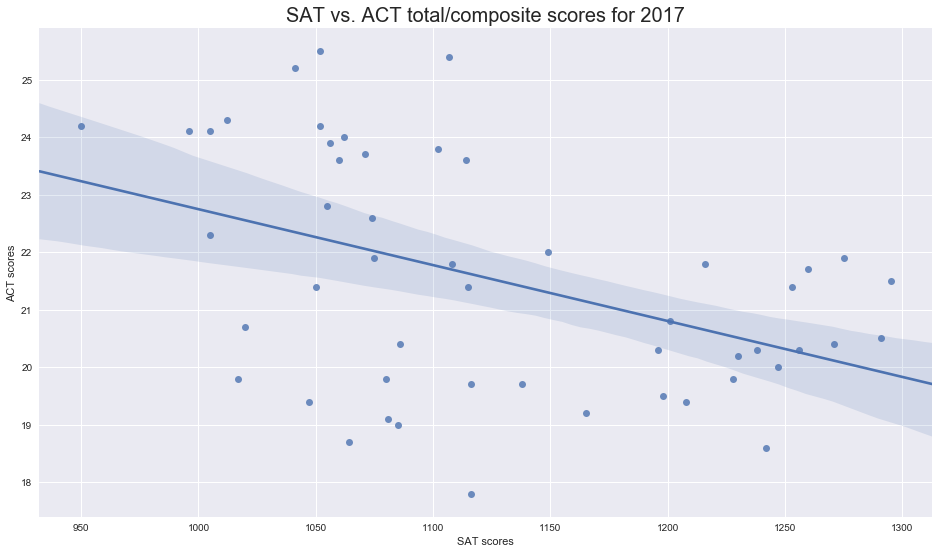

In [11]:
plot_scatterplot('2017_sat_total',
            '2017_act_composite',
            "SAT vs. ACT total/composite scores for 2017",
            "ACT scores",
            "SAT scores")

Negative correlation between 2017 ACT and SAT total/composite scores

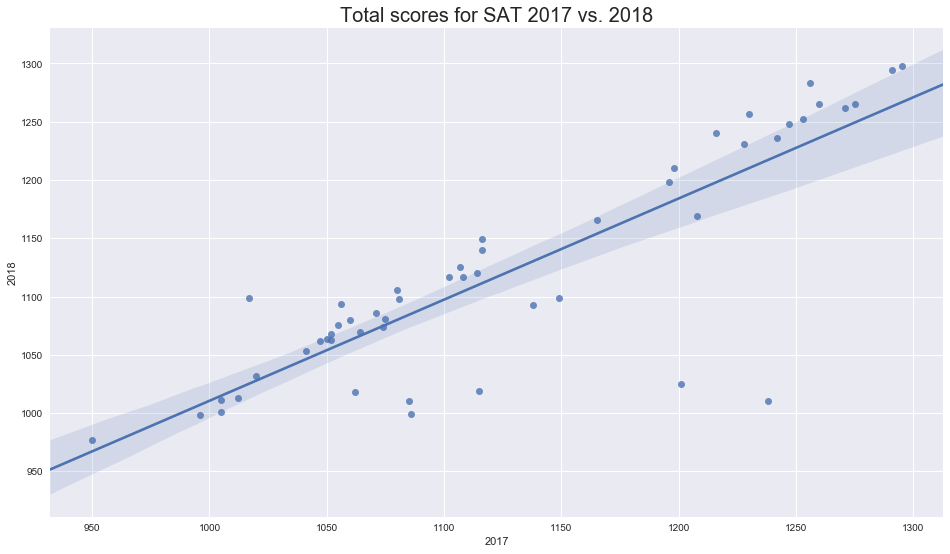

In [13]:
plot_scatterplot('2017_sat_total',
            '2018_sat_total',
            "Total scores for SAT 2017 vs. 2018",
            "2018",
            "2017")

Positive correlation between 2017 and 2018 SAT total scores

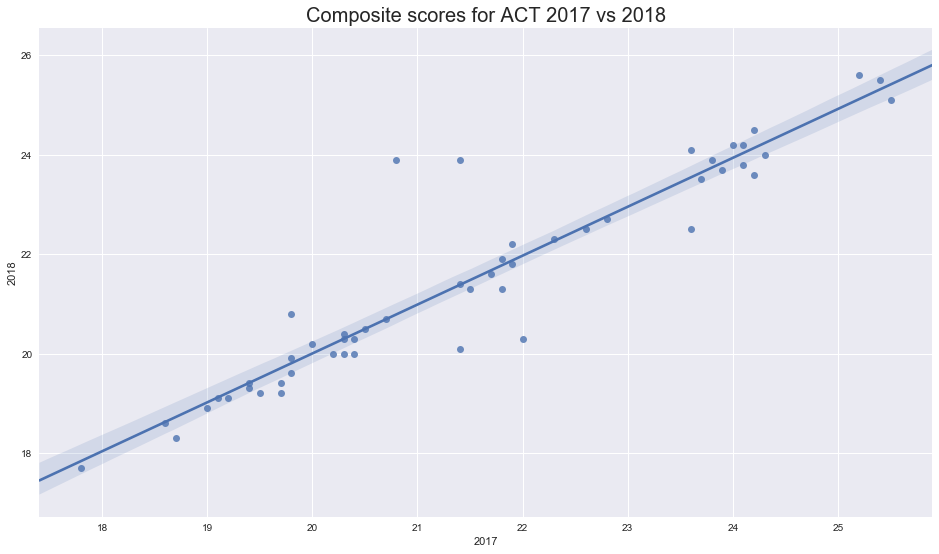

In [14]:
plot_scatterplot('2017_act_composite',
            '2018_act_composite',
            "Composite scores for ACT 2017 vs 2018",
            "2018",
            "2017")

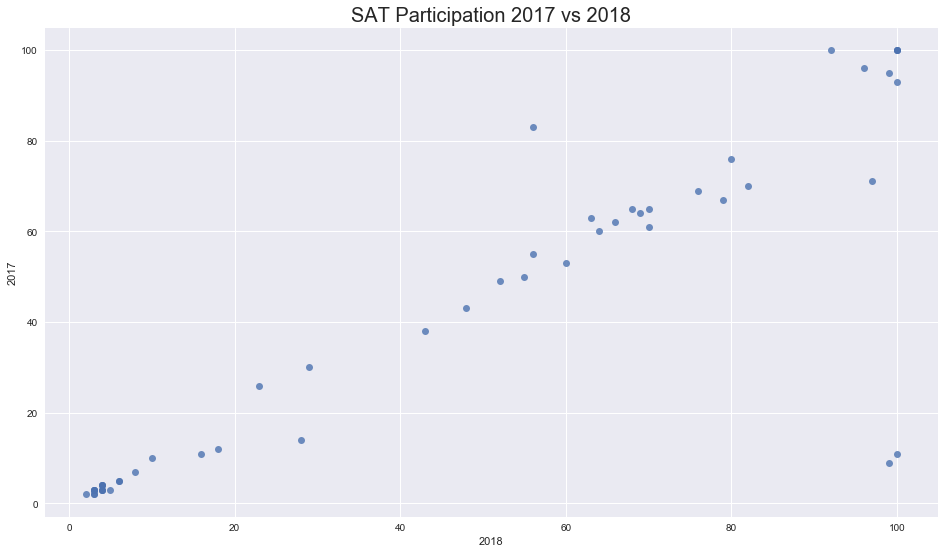

In [18]:
plot_scatterplot('2018_sat_participation',
            '2017_sat_participation',
            "SAT Participation 2017 vs 2018",
            "2017",
            "2018")

Positive correlation between 2017 and 2018 ACT composite scores

# Boxplots

In [ ]:
def boxplot(numeric_variable):
    sns.boxplot(final[numeric_variable])
    plt.title(f'boxplot of {numeric_variable}')
    plt.axvline(final[numeric_variable].mean(), c='r')
    print(f'skew: {final[numeric_variable].skew()}')

## 2017 ACT

In [ ]:
boxplot('2017_act_participation')

skewed left

In [ ]:
boxplot('2017_act_english')

skewed right

In [ ]:
boxplot('2017_act_math')

skewed right

In [ ]:
boxplot('2017_act_reading')

skewed right

In [ ]:
boxplot('2017_act_science')

skewed right

In [ ]:
boxplot('2017_act_composite')

skewed right

## 2017 SAT

In [ ]:
boxplot('2017_sat_participation')

skewed right

In [ ]:
boxplot('2017_sat_evidence-based_reading_and_writing')

skewed right

In [ ]:
boxplot('2017_sat_math')

skewed right

In [ ]:
boxplot('2017_sat_total')

skewed right

## 2018 ACT

In [ ]:
boxplot('2018_act_participation')

skewed left

In [ ]:
boxplot('2018_act_composite')

skewed right

## 2018 SAT

In [ ]:
boxplot('2018_sat_participation')

skewed right

In [ ]:
boxplot('2018_sat_evidence-based_reading_and_writing')

skewed right

In [ ]:
boxplot('2018_sat_math')

skewed right

In [ ]:
boxplot('2018_sat_total')

skewed right

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.